In [1]:
#Loading the dependencies
import os
from csv import reader
import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
#Check the working directory
os.getcwd()
os.chdir("/Users/pw/Desktop/Machine Learning/mlwork")
os.getcwd()

'/Users/pw/Desktop/Machine Learning/mlwork'

In [3]:
#The csv function for uploading the file
def csv_upload(filename):
    dataset = []
    with open(filename, 'r') as csv_file:
        csv_reader = reader(csv_file, delimiter =',')
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
        del dataset[0]
    return dataset

In [4]:
#Uploading the csv file
iris = csv_upload('iris.csv')

In [5]:
iris[1]

['4.9', '3', '1.4', '0.2', 'setosa']

In [6]:
data_file = iris
data_file[1]

['4.9', '3', '1.4', '0.2', 'setosa']

In [7]:
#Delete the fourth column
for row in data_file:
    del row[4]
data_file[1]

['4.9', '3', '1.4', '0.2']

In [8]:
#Change all values from string to float
def string_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

In [9]:
for c in range(len(data_file[0])):
    string_to_float(data_file, c)
data_file[0]

[5.1, 3.5, 1.4, 0.2]

In [10]:
#shuffling the dataset
random.shuffle(data_file)

In [11]:
data_file[0]

[5.4, 3.4, 1.7, 0.2]

In [12]:
#Scaling ~ The minimax function
def mini_max(dataset):
    minimax = []
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        min_value = min(col_values)
        max_value = max(col_values)
        minimax.append([min_value, max_value])
    return minimax

In [13]:
mini_max = mini_max(data_file)
mini_max

[[4.3, 7.9], [2.0, 4.4], [1.0, 6.9], [0.1, 2.5]]

In [14]:
#Normalizing the data using the minimax normalization
def minmax_normalization(dataset, minimax):
    for row in dataset:
        for i in range(len(dataset[0])):
            row[i] = (row[i] - minimax[i][0]) / (minimax[i][1] - minimax[i][0])
    return dataset

In [15]:
norm_file = minmax_normalization(data_file,mini_max)
norm_file[0]

[0.30555555555555564,
 0.5833333333333333,
 0.11864406779661016,
 0.04166666666666667]

In [16]:
#Creating the test and train data sets
file_array =np.asarray(norm_file)
file_array[0:5,]

array([[0.30555556, 0.58333333, 0.11864407, 0.04166667],
       [0.41666667, 0.33333333, 0.69491525, 0.95833333],
       [0.66666667, 0.20833333, 0.81355932, 0.70833333],
       [0.13888889, 0.41666667, 0.06779661, 0.08333333],
       [0.33333333, 0.625     , 0.05084746, 0.04166667]])

In [17]:
train_Y = file_array[0:120, 2]
test_Y = file_array[121:,2]
test_Y[0:5]

array([0.79661017, 0.54237288, 0.57627119, 0.05084746, 0.76271186])

In [18]:
train_X = file_array[0:120, 0]
test_X = file_array[121:,0]

In [19]:
#The batch gradient descent algorithm
def gradient_descent(x, y, alpha, max_error = 0.001, max_iterations = 10000):
    coef = []
    converged = False
    iter = 0
    m = x.shape[0]
    
    #Initializing the firts theta's
    theta0 = 0.1
    theta1 = 0.1
    
    #Initial error
    
    Jtheta = sum([(theta0 + theta1*x[i]-y[i])**2 for i in range(m)])
    
    while not converged:
        #calculating the updates
        grad0 = 1/m * sum([(theta0 + theta1 * x[i] - y[i])for i in range(m)])
        grad1 = 1/m * sum([(theta0 + theta1 * x[i] - y[i]) * x[i] for i in range(m)])
        
        #updating the coeffients
        
        theta0 = theta0 - alpha*grad0
        theta1 = theta1 - alpha*grad1
        
        e = sum([(theta0 + theta1*x[i] - y[i])**2 for i in range(m)])
        
        #Exiting loop / Termination condition
        
        if abs(Jtheta-e) <= max_error:
            print("Converged, number of iteration", iter)
            converged = True
        Jtheta = e
        iter += 1
        
        if iter == max_iterations:
            print('Maximum number of iterations reached')
            converged = true
    coef.append(theta0)
    coef.append(theta1)
    return coef
    

In [20]:
#the prediction function
def predict(x, coef):
    predicted = list()
    m = x.shape[0]
    for i in range(m):
        predict = coef[0] + coef[1]*x[i]
        predicted.append(predict)
    return predicted

In [21]:
def error_calc(actual, predicted):
    sum_error = 0
    for i in range(len(actual)):
        sum_error += (predicted[i]-actual[i])**2
    mean_error = math.sqrt(sum_error/len(actual))
    return mean_error 

In [22]:
coef = gradient_descent(train_X, train_Y,0.01, max_error = 0.0001, max_iterations = 10000)
predicted = predict(test_X, coef)
mean_error = error_calc(test_Y, predicted)
print('Coefficients: ', coef)
print('Mean Squared Error: ', mean_error)

Converged, number of iteration 4216
Coefficients:  [0.05722241962780848, 0.9919888793602278]
Mean Squared Error:  0.1830144757506326


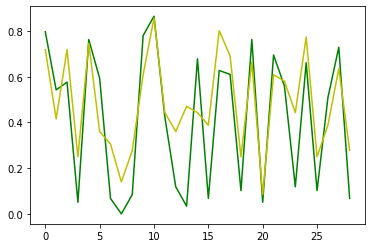

In [23]:
#Line graph comparing the predicted against the actual
plt.plot(test_Y, color = 'g')
plt.plot(predicted, color = 'y')
plt.show()